<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">

</figure>
    
    
# Object Oriented Programming

In this notebook you will use the basics of Object Oriented Programming in Python. This notebook covers the following topics:

- how to create a class
- constructor (`__init__`)
- methods and attributes
- private vs. public methods

We will work with CSV files containing daily precipitation data from KNMI. The files are in the data folder of the current directory. 
<br>
<div style="text-align: right"> developed by MAMBA </div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import locale
import glob

# set local time to Dutch (used for month name e.g. 'mei' in 3 mei, 2020)
locale.setlocale(locale.LC_TIME, 'nl_NL.utf8')

'nl_NL.utf8'

#### Goal;

There are multiple KNMI stations with precipitation data. We want to create a class containing different methods and attributes such that we can easily
- Find which data files are available
- Read the data. E.g. the data should be stored in a dataframe, the column with dates should get the right datatype.
- Analyze the data. E.g. compare maximum differences between stations.

The following exercises will help you built-up this class step by step

## Assingment 1: Defining the class & the __init__ method

Create a class called KNMI. Specify the constructor (`__init__`) method. 
The `__init__` method is always executed when you create an instance of your class. In our `__init__` method four attributes should be assinged, their names and values should be:
1. `source` (with value `'KNMI'`), 
2. `url`, with value `'https://weerdata.nl/'`
3. `stations` (an empty list)
4. `data` (should start as `None`)

To create the `__init__` method: 
- The init method is defined by stating `def __init__(self):` 
- An attribute can be assigned by stating `self.<attribute_name> = <value>`. 

Create an instance of your class and print the values of the attributes.

In [ ]:
# create your class here

In [4]:
# create your instance and print the attributes here

## Assignment 2: Create a method

Expand your class from the previous exercise. Create a method called `find_available_files` which returns a list with all the files in the data folder. 

Creating a method is similar to creating a function. Your input arguments should be `self` (for all methods in a class) and  `path_to_folder`.

You can use the `glob.glob` function to list all the files with a certain extension (e.g. `glob.glob(f"{path_to_folder}/*.csv")`).

Create an instance of your class & call your method. Print the available files.

In [ ]:
# create your class here

In [3]:
# create your instance and call your method here

## Assignment 3: Methods II

Expand your class from the previous exercise even further. Create another method called `add_station` in your class that does the following:
1. Take the csv file path and the station name as arguments;
2. Read the csv file into a pandas dataframe, with the dates as index;
3. Convert the date column to a datetime object (see hints I & II);
4. Change the column name 'Neerslag [mm]' to the station name. You can use `df = df.rename('<oldName1>':'<newName1>')`;
5. Append the station name to the `stations` attribute you defined in the `__init__` method;
6. Add the dataframe to the `data` attribute. If it is the first added station (i.e. `data = None`), set attribute `data` to the new dataframe. Else, join the new dataframe with the existing dataframe.

Run the checks below to see if your method works accordingly.

Hint I: you can convert a string to a datetime object using the `strptime` function of the `datetime` package. https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes gives an overview of all the options you can choose. You'll need to look into the file to see what the date format looks like in your file. The format is the same for all files. 

Hint II: Pandas has the `to_datetime` function to convert all strings in a column to datetimes. An example is given in the answer to this stack-overflow question. https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime. 

Hint III: the first argument of the method should be `self`, followed by the names of your two other arguments. You don't need to specify `self` when you call the method from the instance of you class. 

In [2]:
# examples string to datetime conversion:

# example 1 s
date_time_str = '2018-06-29 08::15::27'
date_time_obj = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H::%M::%S')
print(date_time_obj)

# example 2
date_time_str_2 = '2018, jun 5, 16:00'
date_time_obj_2 = dt.datetime.strptime(date_time_str_2, '%Y, %b %d, %H:%M')
print(date_time_obj_2)

2018-06-29 08:15:27
2018-06-05 16:00:00


In [ ]:
# create your class and methods here

In [ ]:
# 1st check read csv file from Rotterdam
knmi = KNMI()

knmi.add_station(r'./data/Neerslag_Tijdreeks-Rotterdam-.csv',
                 'Rotterdam')

print(knmi.stations)

knmi.data.head()

['Rotterdam']


,Rotterdam
Datum,
2019-01-01,0.9
2019-01-02,0.4
2019-01-03,2.0
2019-01-04,0.2
2019-01-05,0.0


In [ ]:
# 2nd check: add station Hoek van Holland

# this code should generate an object:
# 1. Where the 'station' attribute is a list with 'Rotterdam' and 'Hoek van Holland'
# 2. Where the 'data' attribute is a dataframe with dates as index, and precipitation 
#    data of the stations Rotterdam and Hoek van Holland. 

knmi.add_station(r'./data/Neerslag_Tijdreeks-Hoek van Holland-.csv', 
                 'Hoek van Holland')

print(knmi.stations)

knmi.data.head()

['Rotterdam', 'Hoek van Holland']


,Rotterdam,Hoek van Holland
Datum,,
2019-01-01,0.9,0.3
2019-01-02,0.4,0.6
2019-01-03,2.0,0.9
2019-01-04,0.2,0.0
2019-01-05,0.0,0.1


## Assignment 4 - Private method: mean monthly precipitation difference between stations

A private method is a method that should only be called by other methods, not by the user him/herself. You can create a private method by adding a single, trailing underscore `_` to the name of the method.

Create a private method called `_avrg_diff` that is only called within the `add_station` method. The `_avrg_diff` should calculate:
1. The difference in precipitation value between two stations for each day. If you have two stations this is simply the difference between the two stations. If you have 3 stations it is the maximum difference between any of the 3 stations. Make sure it works for any number of stations.
2. For each month, calculate the mean value of the difference. Return the value and assign the outcome to the attribute `mean_monthly_difference`. (Hint, look at the `df.resample` method). 

Adjust the method `add_station` to make sure that when new data is added, the avrg_diff is automatically (re)calculated. 

In [8]:
# create your class and methods here


In [9]:
# check if your code runs as expected

knmi = KNMI()

knmi.add_station(r'./data/Neerslag_Tijdreeks-Rotterdam-.csv',
                 'Rotterdam')

knmi.add_station(r'./data/Neerslag_Tijdreeks-Hoek van Holland-.csv', 
                 'Hoek van Holland')

knmi.mean_monthly_difference.head()

Datum
2019-01-31    0.877419
2019-02-28    0.646429
2019-03-31    0.783871
2019-04-30    0.400000
2019-05-31    0.845161
Freq: M, dtype: float64

## Assignment 5: Plot the mean, monthly difference

Create a plot method for the mean monthly difference. First add one station and plot the average difference in precipitation between stations. Add 1 more station and plot the monthly differnce in the same graph. Add all stations and plot the monthly difference again in the same graph. 

In [12]:
# create your class and methods here


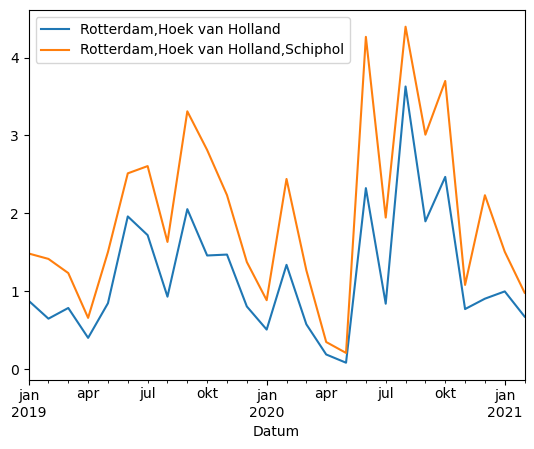

In [11]:
# check if your code runs as expected

knmi = KNMI()

knmi.add_station(r'./data/Neerslag_Tijdreeks-Rotterdam-.csv',
                 'Rotterdam')

knmi.add_station(r'./data/Neerslag_Tijdreeks-Hoek van Holland-.csv', 
                 'Hoek van Holland')

knmi.plot()

knmi.add_station(r'./data/Neerslag_Tijdreeks-Schiphol-.csv', 
                 'Schiphol')

knmi.plot()



## Assignment 6: arguments when initializing the class

Let's create a method `add_directory` and adjust the class so you can specify a directory when creating an object of your class. In the initialization all csv files in that directory should be read and the data added to the object. 

Plot the maximum difference of all stations (only one line in the graph this time). See how short and clear the script has become?


In [16]:
# create your class and methods here

,Cabouw,De Bilt,Herwijnen,Hoek van Holland,Rotterdam,Schiphol
Datum,,,,,,
2019-01-01,1.0,0.4,0.8,0.3,0.9,0.5
2019-01-02,0.0,0.2,0.1,0.6,0.4,0.0
2019-01-03,0.0,0.0,0.0,0.9,2.0,0.0
2019-01-04,0.0,0.0,0.0,0.0,0.2,0.0
2019-01-05,0.5,0.3,0.4,0.1,0.0,0.1


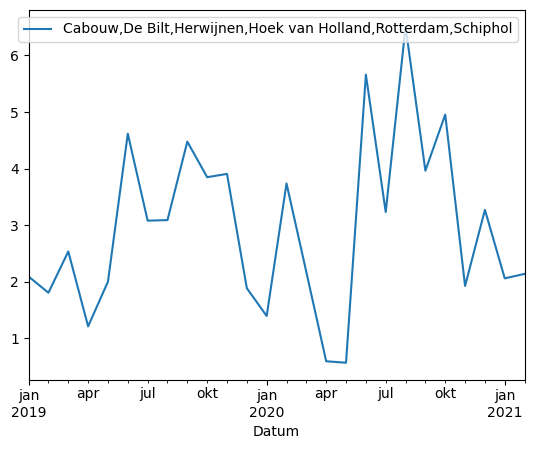

In [ ]:
# check if your code runs as expected

knmi= KNMI(path=r'.\data')
knmi.plot()
knmi.data.head()

# Great work!